<a href="https://colab.research.google.com/github/an-frez/FMY0100_EA1/blob/main/FMY0100_EA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Evaluación Parcial 1: Estadística aplicada a Machine Learning
# FUNDAMENTOS DE MACHINE LEARNING_001D

# Escoger data

In [1]:
# importa las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Subir CSV como Archivo Local
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep="	")

Saving marketing_campaign.csv to marketing_campaign (1).csv


In [23]:
# Comprobar que el archivo este bien subido
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [24]:
# Quitar las columnas inecesarias para el analisis
df = df.drop(columns=['Dt_Customer']) # info cliente no relevante
df = df.drop(columns=['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']) # info promociones no relevante
df = df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']) #info lugar de compra no relevante
df = df.drop(columns=['Z_CostContact', 'Z_Revenue']) #info sin descripcion en kraggle
# Comprobar que las columas hayan sido removidas
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,0,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,0,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,0,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,0,3,11
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,3,11
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,0,3,11
6,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,0,3,11
7,6177,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,0,3,11
8,4855,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,0,3,11
9,5899,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,0,3,11


In [26]:
# Renombrar coumas para analisarlas mas facilmente
df = df.rename(columns={"Recency": "Days_Since_Purchase",
                        "MntWines": "Wine_Purchases_2yrs",
                        "MntFruits": "Fruit_Purchases_2yrs",
                        "MntMeatProducts": "Meat_Purchases_2yrs",
                        "MntFishProducts": "Fish_Purchases_2yrs",
                        "MntSweetProducts": "Sweets_Purchases_2yrs",
                        "MntGoldProds": "Gold_Purchases_2yrs",
                        "Complain": "hasComplained_2yrs"
                        })
df.head(10) # Ver cambios

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Days_Since_Purchase,Wine_Purchases_2yrs,Fruit_Purchases_2yrs,Meat_Purchases_2yrs,Fish_Purchases_2yrs,Sweets_Purchases_2yrs,Gold_Purchases_2yrs,hasComplained_2yrs
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,0
6,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,0
7,6177,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,0
8,4855,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,0
9,5899,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,0


# Limpiar Data

### Detectando datos nulos

In [27]:
df.isnull().sum() #ver si hay datos nulos

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Days_Since_Purchase,0
Wine_Purchases_2yrs,0
Fruit_Purchases_2yrs,0


Solo los 24 filas en la columna de ingresos tiene datos nulos, asi que los voy a llenar con el promedio de ingresos en ves de eliminarlos.

In [35]:
df.Income = df.Income.fillna(df.Income.mean()) # Llenar los datos vacios (income) con el promedio

In [36]:
df.isnull().sum() # verificar cambios

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Days_Since_Purchase,0
Wine_Purchases_2yrs,0
Fruit_Purchases_2yrs,0


### Detectando datos Outlier

<Axes: xlabel='Income'>

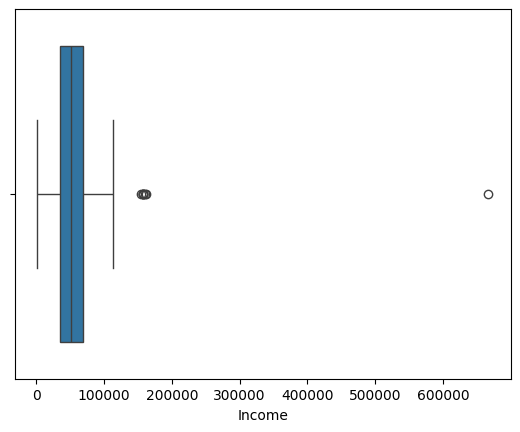

In [38]:
# Se usa el diagrama de caja en los datos mas relevantes
sns.boxplot(x=df['Income'])

<Axes: xlabel='Days_Since_Purchase'>

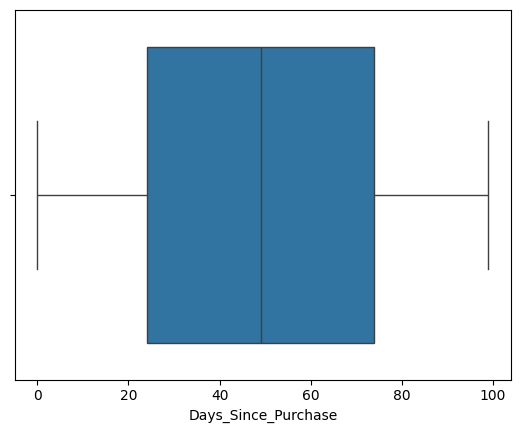

In [39]:
sns.boxplot(x=df['Days_Since_Purchase'])

<Axes: xlabel='Wine_Purchases_2yrs'>

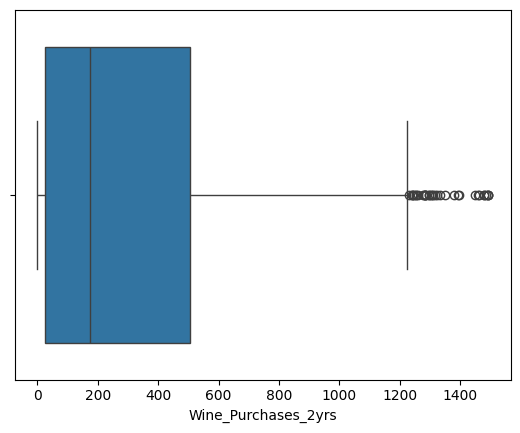

In [40]:
sns.boxplot(x=df['Wine_Purchases_2yrs'])

<Axes: xlabel='Sweets_Purchases_2yrs'>

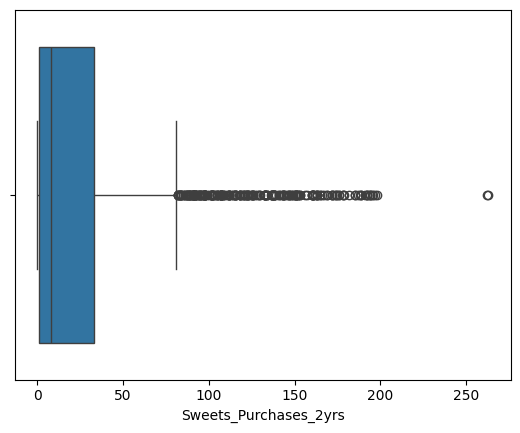

In [42]:
sns.boxplot(x=df['Sweets_Purchases_2yrs'])

<Axes: xlabel='Gold_Purchases_2yrs'>

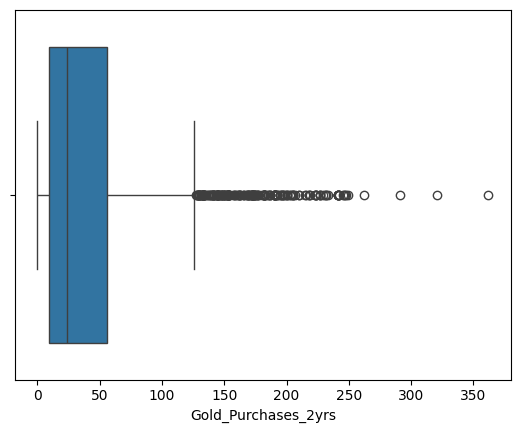

In [43]:
sns.boxplot(x=df['Gold_Purchases_2yrs'])

In [46]:
# agrupar datos numeros a corregir (compras)
df_purchases = df.drop(columns=["ID",
                                "Year_Birth",
                                "Education",
                                "Marital_Status",
                                "Income",
                                "Kidhome",
                                "Teenhome",
                                "hasComplained_2yrs"])

In [49]:
Q1 = df_purchases.quantile(0.25) # Primer cuartil
Q3 = df_purchases.quantile(0.75) # Tercer cuartil
IQR = Q3 - Q1 # Rango intercuartil
print("--Rango intercuartil\n",IQR)
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print("--Upper limit\n",upper_limit)
print("--Lower limit\n",lower_limit)

--Rango intercuartil
 Days_Since_Purchase       50.0
Wine_Purchases_2yrs      480.5
Fruit_Purchases_2yrs      32.0
Meat_Purchases_2yrs      216.0
Fish_Purchases_2yrs       47.0
Sweets_Purchases_2yrs     32.0
Gold_Purchases_2yrs       47.0
dtype: float64
--Upper limit
 Days_Since_Purchase       149.0
Wine_Purchases_2yrs      1225.0
Fruit_Purchases_2yrs       81.0
Meat_Purchases_2yrs       556.0
Fish_Purchases_2yrs       120.5
Sweets_Purchases_2yrs      81.0
Gold_Purchases_2yrs       126.5
dtype: float64
--Lower limit
 Days_Since_Purchase      -51.0
Wine_Purchases_2yrs     -697.0
Fruit_Purchases_2yrs     -47.0
Meat_Purchases_2yrs     -308.0
Fish_Purchases_2yrs      -67.5
Sweets_Purchases_2yrs    -47.0
Gold_Purchases_2yrs      -61.5
dtype: float64


No hay compras por debajo del limite

In [50]:
#caping compras outlier
def check_outliers(col):
  for col in outliers_cols:
    print(f"{col} outliers: {new_df_cap[new_df_cap[col] > upper_limit[col]].shape[0]+new_df_cap[new_df_cap[col] < lower_limit[col]].shape[0]}")
  return

new_df_cap = df.copy()
outliers_cols = ["Days_Since_Purchase",
                 "Wine_Purchases_2yrs",
                 "Fruit_Purchases_2yrs",
                 "Meat_Purchases_2yrs",
                 "Fish_Purchases_2yrs",
                 "Sweets_Purchases_2yrs",
                 "Gold_Purchases_2yrs"]

check_outliers(outliers_cols) # ver columas antes del cambio

# Cambiar valores outliers por el limite maximo
for col in outliers_cols:
  new_df_cap[col] = np.where(
      new_df_cap[col] > upper_limit[col], upper_limit[col],
    np.where(
        new_df_cap[col] < lower_limit[col], lower_limit[col],
        new_df_cap[col])) # no hay valores por debajo del limite minimo pero lo coloco igual
print("--------------")
check_outliers(outliers_cols) # ver columas despues del cambio

Days_Since_Purchase outliers: 0
Wine_Purchases_2yrs outliers: 35
Fruit_Purchases_2yrs outliers: 227
Meat_Purchases_2yrs outliers: 175
Fish_Purchases_2yrs outliers: 223
Sweets_Purchases_2yrs outliers: 248
Gold_Purchases_2yrs outliers: 207
Days_Since_Purchase outliers: 0
Wine_Purchases_2yrs outliers: 0
Fruit_Purchases_2yrs outliers: 0
Meat_Purchases_2yrs outliers: 0
Fish_Purchases_2yrs outliers: 0
Sweets_Purchases_2yrs outliers: 0
Gold_Purchases_2yrs outliers: 0


# Analisis de datos

Mapa de calor entre las compras para ver si hay correlacion entre ellas.

,Days_Since_Purchase,Wine_Purchases_2yrs,Fruit_Purchases_2yrs,Meat_Purchases_2yrs,Fish_Purchases_2yrs,Sweets_Purchases_2yrs,Gold_Purchases_2yrs
Days_Since_Purchase,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693
Wine_Purchases_2yrs,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
Fruit_Purchases_2yrs,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
Meat_Purchases_2yrs,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
Fish_Purchases_2yrs,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
Sweets_Purchases_2yrs,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
Gold_Purchases_2yrs,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000


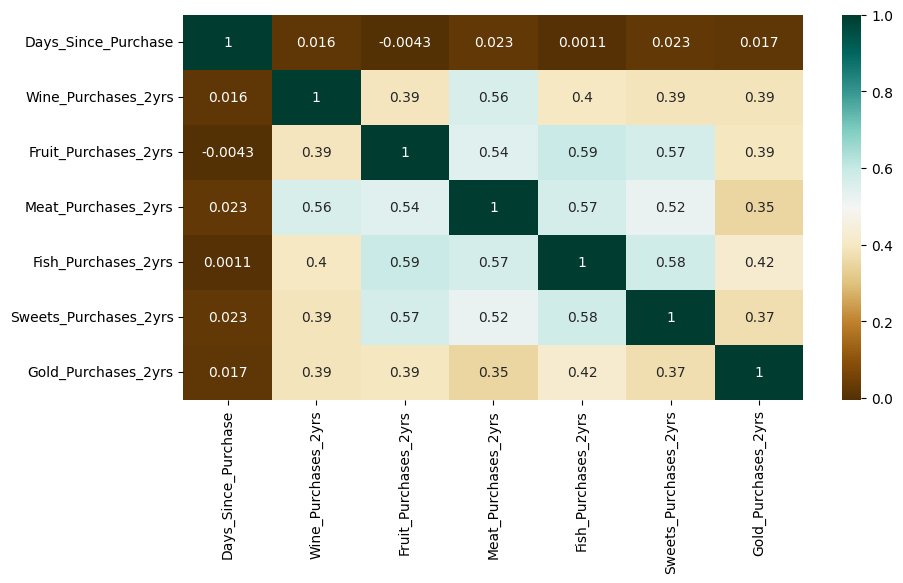

In [52]:
# mapa de calor
plt.figure(figsize=(10,5))
c= df_purchases.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Se puede concluir con este grafico que:

*   Comprar oro no esta muy fuertemente relacionado con ninguna otra compra
*   Los que compran dulces generalmente no compran vino
* La correlacion mas fuerte entre compras es aquellos que compran frutas y pescados. Quizas quieran una dieta mas sana.



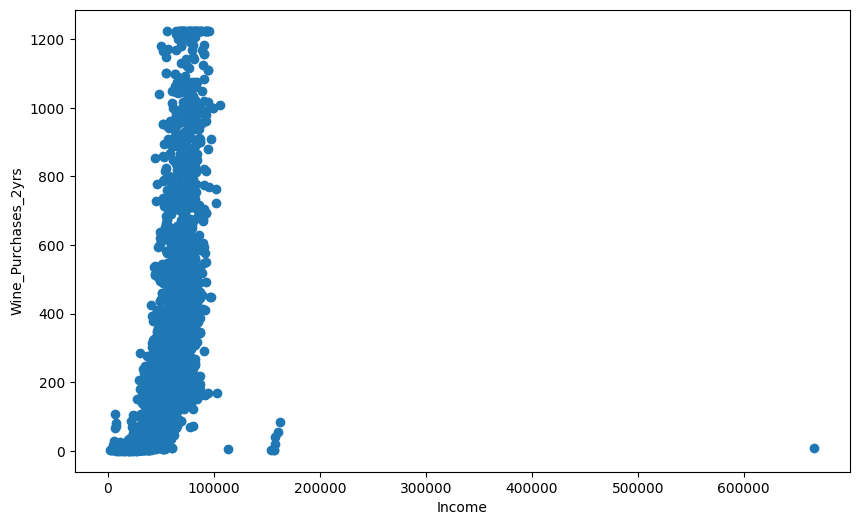

In [56]:
# Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(new_df_cap['Income'], new_df_cap['Wine_Purchases_2yrs'])
ax.set_xlabel('Income')
ax.set_ylabel('Wine_Purchases_2yrs')
plt.show()

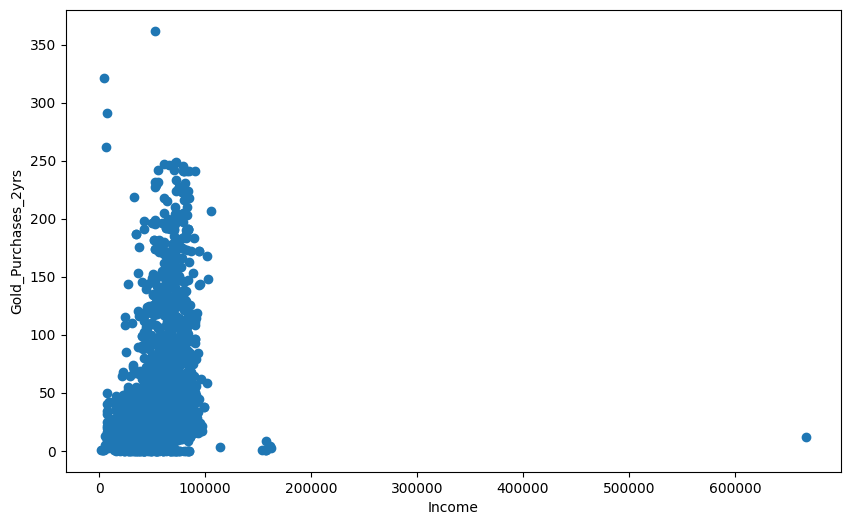

In [58]:
# Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(new_df_cap['Income'], df['Gold_Purchases_2yrs'])
ax.set_xlabel('Income')
ax.set_ylabel('Gold_Purchases_2yrs')
plt.show()

Con este grafico se puede comcluir que la gente con mas dinero tiende a comprar mas vino y oro. Lo cual tendria sentido pues son productos caros. Hay un par de datos outliers que comprar mucho oro y me parecieron interesantes asi que los inclui en el grafico.

In [68]:
new_df_cap[("Income")].describe()

,Income
count,2240.000000
mean,52247.251354
std,25037.797168
min,1730.000000
25%,35538.750000
50%,51741.500000
75%,68289.750000
max,666666.000000


# Medidas de posicion

In [59]:
#Media de todas las columnas

df.select_dtypes(exclude='object').mean()

,0
ID,5592.159821
Year_Birth,1968.805804
Income,52247.251354
Kidhome,0.444196
Teenhome,0.506250
Days_Since_Purchase,49.109375
Wine_Purchases_2yrs,303.935714
Fruit_Purchases_2yrs,26.302232
Meat_Purchases_2yrs,166.950000
Fish_Purchases_2yrs,37.525446


In [60]:
# Mediana de todas las columnas

df.select_dtypes(exclude='object').median()

,0
ID,5458.5
Year_Birth,1970.0
Income,51741.5
Kidhome,0.0
Teenhome,0.0
Days_Since_Purchase,49.0
Wine_Purchases_2yrs,173.5
Fruit_Purchases_2yrs,8.0
Meat_Purchases_2yrs,67.0
Fish_Purchases_2yrs,12.0


In [61]:
#Moda de todas las columnas

df.select_dtypes(exclude='object').mode().iloc[0]

,0
ID,0.000000
Year_Birth,1976.000000
Income,52247.251354
Kidhome,0.000000
Teenhome,0.000000
Days_Since_Purchase,56.000000
Wine_Purchases_2yrs,2.000000
Fruit_Purchases_2yrs,0.000000
Meat_Purchases_2yrs,7.000000
Fish_Purchases_2yrs,0.000000


Es bastante seguro decir que la mayoria de los compradores en este dataframe estan entre los 50 y 55 años de edad. La mayoria de ellos no tiene muchos hijos (niños y adolecentes) en casa, y compran cada dos meses aproximadamente.
Lo que mas compran es vino.


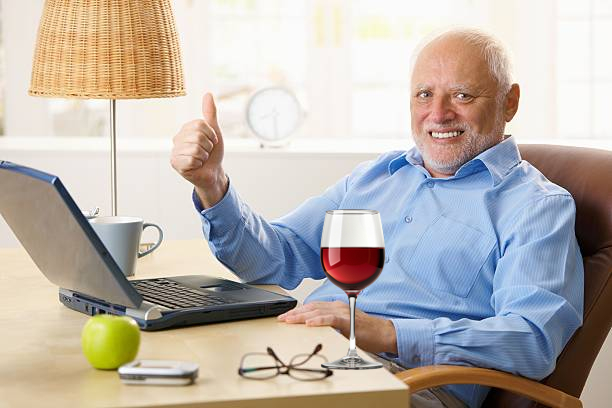